# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Functions

In [22]:

def analyze_spark_metrics(directory="."):
    # 1. Load the most critical files
    # Mapping friendly names to the actual parquet filenames found
    metric_files = {
        "Input_Rate": "*inputRate_total_Number.parquet",
        "Processing_Rate": "*processingRate_total_Number.parquet",
        "Latency": "*latency_Number.parquet",
        "Heap_Usage": "jvm_memory_used_bytes.parquet",
        "CPU_Usage": "container_cpu_usage_seconds_total.parquet"
    }
    
    dataframes = {}
    
    print(f"Searching in {directory}...")
    for label, pattern in metric_files.items():
        files = glob.glob(os.path.join(directory, pattern))
        if files:
            print(f"Found {label}: {files[0]}")
            # Assuming the parquet has 'timestamp' and 'value' columns
            df = pd.read_parquet(files[0])
            # Prometheus exports usually have 'timestamp' and 'value'
            if 'timestamp' in df.columns:
                 df = df.set_index('timestamp')
            
            df = df.sort_index()

            # Adjust timezone if needed (original code had -3h)
            df.index = df.index.to_series() - pd.Timedelta(hours=3)

            # Filter data to the relevant window if needed, or keep all
            # df = df[df.index > pd.Timestamp('2025-12-26 14:15:00')]
            # df = df[df.index < pd.Timestamp('2025-12-26 16:15:00')]
            dataframes[label] = df
        else:
            print(f"Warning: No file found for {label} with pattern {pattern}")

    if not dataframes:
        print("No matching parquet files found.")
        return

    # 2. Visualization
    fig, axes = plt.subplots(2, 1, figsize=(12, 18), sharex=True)

    # Plot 1: Throughput (Input vs Processing Rate)
    if "Input_Rate" in dataframes or "Processing_Rate" in dataframes:
        if "Input_Rate" in dataframes:
             axes[0].plot(dataframes["Input_Rate"].index, dataframes["Input_Rate"]["value"], label="Input Rate (recs/sec)")
        if "Processing_Rate" in dataframes:
             axes[0].plot(dataframes["Processing_Rate"].index, dataframes["Processing_Rate"]["value"], label="Processing Rate (recs/sec)")
        axes[0].set_title("Spark Streaming Throughput")
        axes[0].set_ylabel("Records / Second")
        axes[0].legend()
        axes[0].grid(True)

    # Plot 2: Latency
    if "Latency" in dataframes:
        axes[1].plot(dataframes["Latency"].index, dataframes["Latency"]["value"], label="Latency (ms)", color='orange')
        axes[1].set_title("Spark Streaming Latency")
        axes[1].set_ylabel("Milliseconds")
        axes[1].legend()
        axes[1].grid(True)

    plt.tight_layout()
    plt.show()

# Edge Analysis

## First Run

Searching in ../../data/raw/final-01/final-01_edge...
Found Input_Rate: ../../data/raw/final-01/final-01_edge/metrics_spark_jobs_streaming_pipeline_kafka_avro_to_delta_driver_spark_streaming_raw_robot_data_avro_inputRate_total_Number.parquet
Found Processing_Rate: ../../data/raw/final-01/final-01_edge/metrics_spark_jobs_streaming_pipeline_kafka_avro_to_delta_driver_spark_streaming_raw_robot_data_avro_processingRate_total_Number.parquet
Found Latency: ../../data/raw/final-01/final-01_edge/metrics_spark_jobs_streaming_pipeline_kafka_avro_to_delta_driver_spark_streaming_raw_robot_data_avro_latency_Number.parquet
Found Heap_Usage: ../../data/raw/final-01/final-01_edge/jvm_memory_used_bytes.parquet
Found CPU_Usage: ../../data/raw/final-01/final-01_edge/container_cpu_usage_seconds_total.parquet


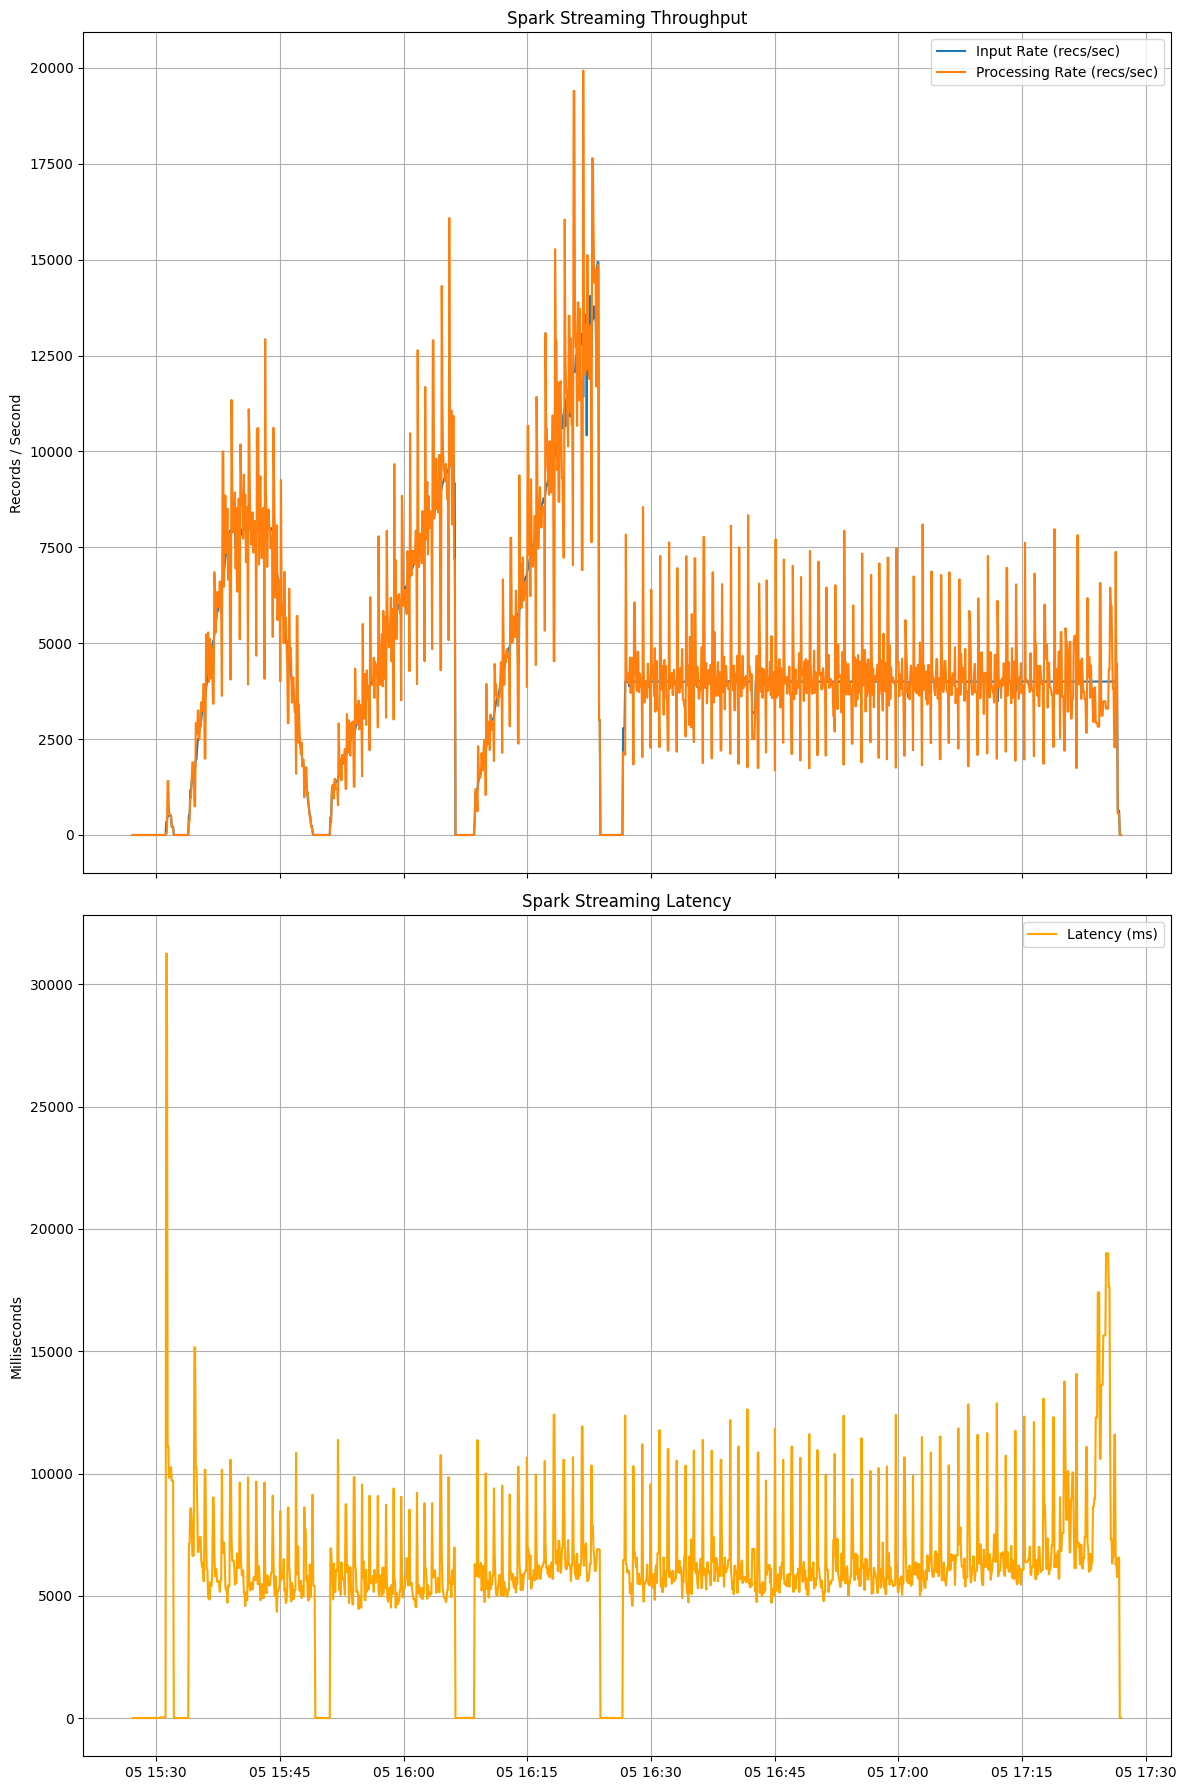

In [23]:
# Run the analysis
analyze_spark_metrics("../../data/raw/final-01/final-01_edge")

## Rerun

Searching in ../../data/raw/final-01/rerun/final-01_edge...
Found Input_Rate: ../../data/raw/final-01/rerun/final-01_edge/metrics_spark_jobs_streaming_pipeline_kafka_avro_to_delta_driver_spark_streaming_raw_robot_data_avro_inputRate_total_Number.parquet
Found Processing_Rate: ../../data/raw/final-01/rerun/final-01_edge/metrics_spark_jobs_streaming_pipeline_kafka_avro_to_delta_driver_spark_streaming_raw_robot_data_avro_processingRate_total_Number.parquet
Found Latency: ../../data/raw/final-01/rerun/final-01_edge/metrics_spark_jobs_streaming_pipeline_kafka_avro_to_delta_driver_spark_streaming_raw_robot_data_avro_latency_Number.parquet
Found Heap_Usage: ../../data/raw/final-01/rerun/final-01_edge/jvm_memory_used_bytes.parquet
Found CPU_Usage: ../../data/raw/final-01/rerun/final-01_edge/container_cpu_usage_seconds_total.parquet


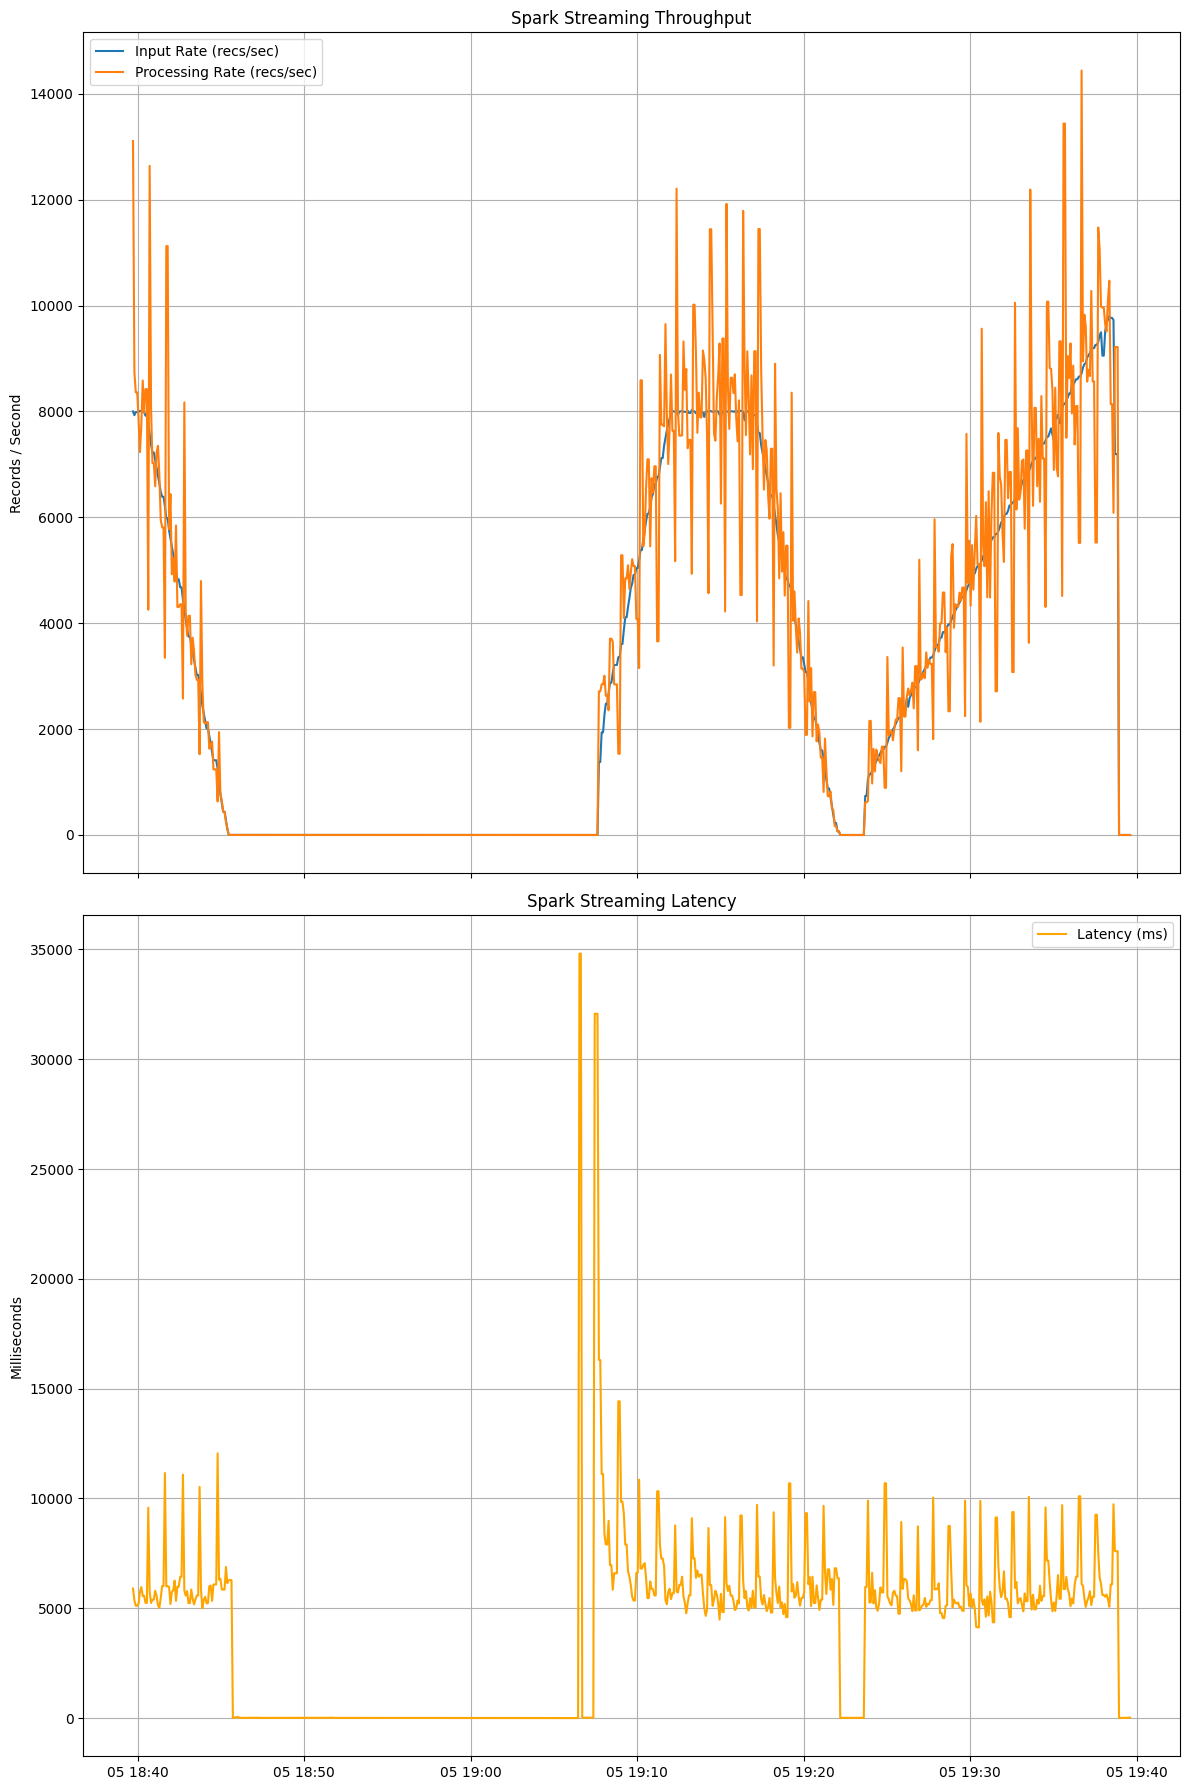

In [24]:
# Run the analysis
analyze_spark_metrics("../../data/raw/final-01/rerun/final-01_edge")

# Cloud Analysis

Searching in ../../data/raw/final-01/final-01_cloud...
Found Input_Rate: ../../data/raw/final-01/final-01_cloud/metrics_spark_jobs_streaming_pipeline_kafka_avro_to_delta_driver_spark_streaming_raw_robot_data_avro_inputRate_total_Number.parquet
Found Processing_Rate: ../../data/raw/final-01/final-01_cloud/metrics_spark_jobs_streaming_pipeline_kafka_avro_to_delta_driver_spark_streaming_raw_robot_data_avro_processingRate_total_Number.parquet
Found Latency: ../../data/raw/final-01/final-01_cloud/metrics_spark_jobs_streaming_pipeline_kafka_avro_to_delta_driver_spark_streaming_raw_robot_data_avro_latency_Number.parquet
Found Heap_Usage: ../../data/raw/final-01/final-01_cloud/jvm_memory_used_bytes.parquet
Found CPU_Usage: ../../data/raw/final-01/final-01_cloud/container_cpu_usage_seconds_total.parquet


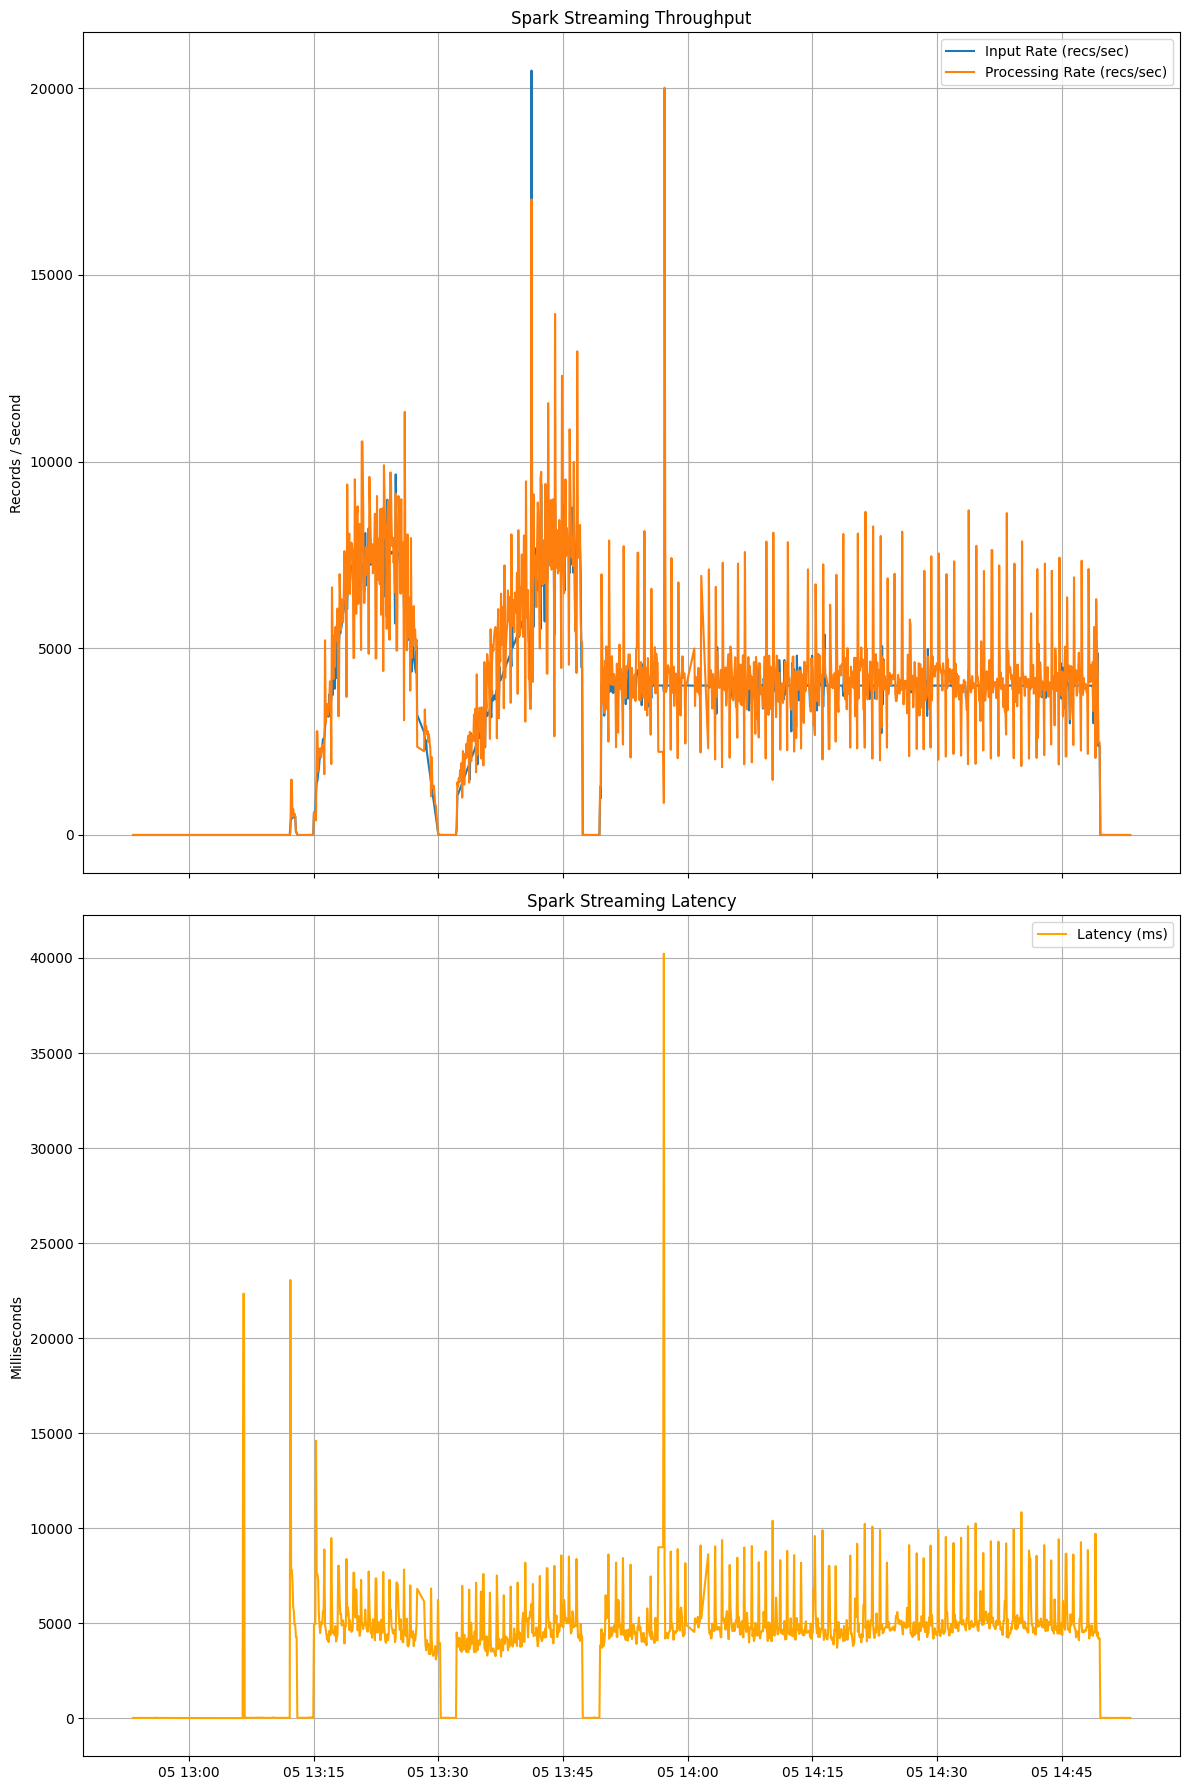

In [25]:
# Run the analysis
analyze_spark_metrics("../../data/raw/final-01/final-01_cloud")